Primele 5 linii ale setului de date:
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

Descrierea setului de date:
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4

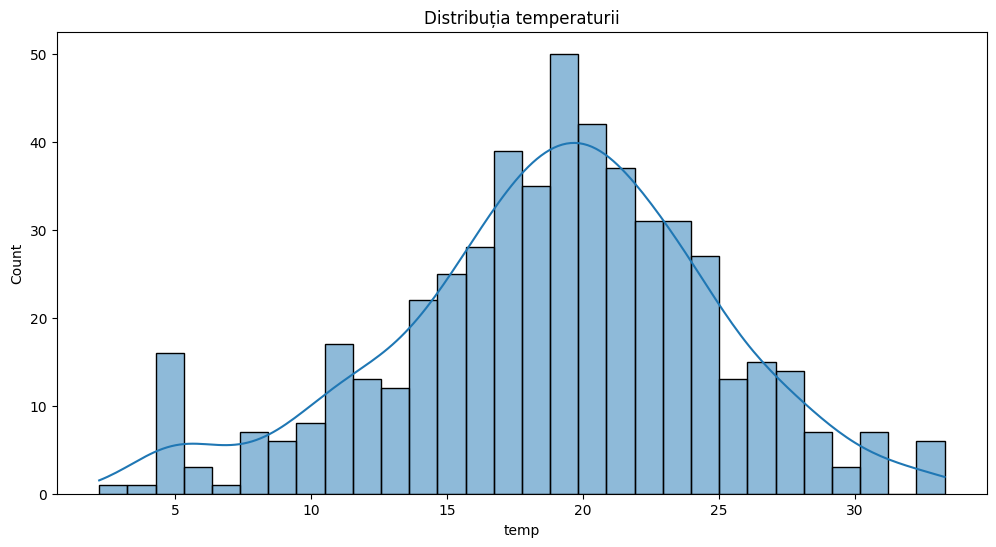

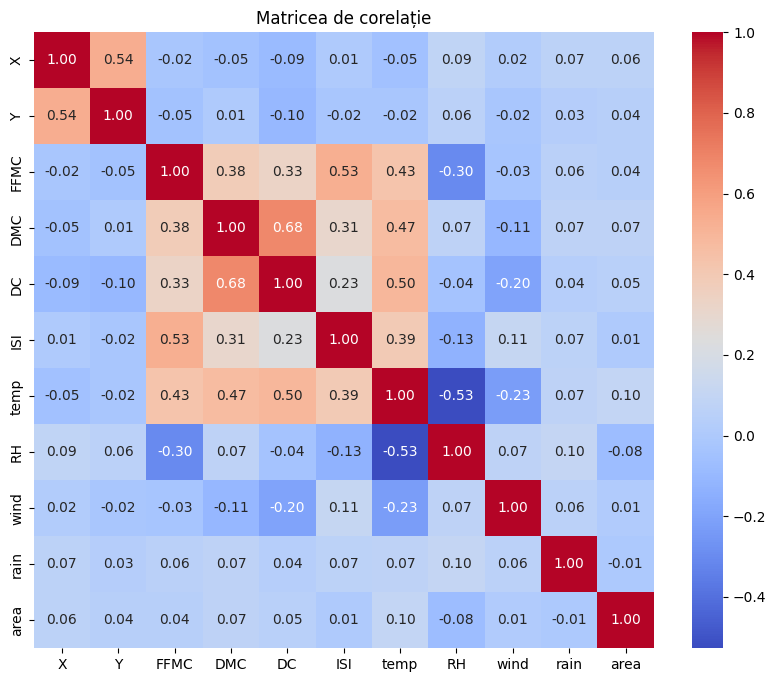


Varianta explicată de PCA: [9.66771835e-01 3.23722970e-02 5.08398557e-04 1.73712014e-04
 8.89444075e-05]

Setul de date preprocesat a fost salvat ca 'forestfires_preprocessed.csv'


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA

# 1. Încărcarea setului de date
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
df = pd.read_csv(url)

# 2. Explorarea datelor
print("Primele 5 linii ale setului de date:")
print(df.head())
print("\nDescrierea setului de date:")
print(df.describe())

# 3. Verificarea datelor lipsă
print("\nValori lipsă în setul de date:")
print(df.isnull().sum())

# 4. Vizualizarea distribuției datelor
plt.figure(figsize=(12,6))
sns.histplot(df['temp'], bins=30, kde=True)
plt.title("Distribuția temperaturii")
plt.show()

# 5. Heatmap pentru corelații (doar pentru coloanele numerice)
df_numeric = df.select_dtypes(include=[np.number])  # Selectează doar coloanele numerice
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matricea de corelație")
plt.show()

# 6. Standardizare și normalizare
scaler = StandardScaler()
df[['temp', 'RH', 'wind', 'rain']] = scaler.fit_transform(df[['temp', 'RH', 'wind', 'rain']])

minmax_scaler = MinMaxScaler()
df[['area']] = minmax_scaler.fit_transform(df[['area']])

# 7. Codificare variabile categoriale
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_features = df[['month', 'day']]
categorical_encoded = encoder.fit_transform(categorical_features)
categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out())
df = pd.concat([df.drop(['month', 'day'], axis=1), categorical_df], axis=1)

# 8. Reducerea dimensionalității cu PCA
pca = PCA(n_components=5)
pca_features = pca.fit_transform(df)
print("\nVarianta explicată de PCA:", pca.explained_variance_ratio_)

# Salvarea datelor preprocesate
preprocessed_df = pd.DataFrame(pca_features)
preprocessed_df.to_csv("forestfires_preprocessed.csv", index=False)
print("\nSetul de date preprocesat a fost salvat ca 'forestfires_preprocessed.csv'")

# New section

RMSE: 2.37
MAE: 1.92
R² Score: 0.02


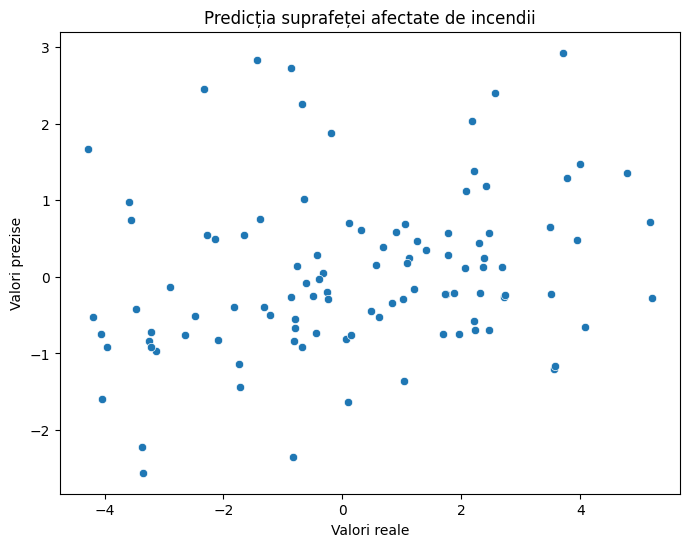

Modelul Random Forest a fost salvat ca 'random_forest_model.pkl'


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Încărcarea setului de date preprocesat cu nume de coloane explicite
column_names = ["feature1", "feature2", "feature3", "feature4", "area"]
df = pd.read_csv("forestfires_preprocessed.csv", names=column_names)

# 2. Definirea variabilelor de intrare (X) și ieșire (y)
X = df.drop(columns=['area'])  # Eliminăm coloana țintă (area afectată)
y = df['area']

# 3. Împărțirea datelor în seturi de antrenare și test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Inițializarea și antrenarea modelului Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42)
rf_model.fit(X_train, y_train)

# 5. Predicția pe setul de test
y_pred = rf_model.predict(X_test)

# 6. Calcularea metricilor de performanță
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 7. Afișarea rezultatelor
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 8. Vizualizarea relației între valorile reale și cele prezise
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valori reale")
plt.ylabel("Valori prezise")
plt.title("Predicția suprafeței afectate de incendii")
plt.show()

# 9. Salvarea modelului antrenat (opțional)
import joblib
joblib.dump(rf_model, "random_forest_model.pkl")
print("Modelul Random Forest a fost salvat ca 'random_forest_model.pkl'")